# Trainieren eines neuronalen Netzwerks zur Klassifikation

In [1]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

## Iris Datensatz

Der Iris Datensatz (siehe https://en.wikipedia.org/wiki/Iris_flower_data_set) enthält je 50 Beispiele für jede der drei Iris Blumen Arten (Iris setosa, Iris virginica and Iris versicolor). Gemessen wurden je die Breite und die Länge des Kelch- und Kronenblattes (Sepal and Petal). Auf Grundlage dieser Messung soll die Art der Blume bestimmt werden.

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_features = iris_dataset['data']
iris_targets = iris_dataset['target']
iris_target_names = iris_dataset['target_names']
iris_target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

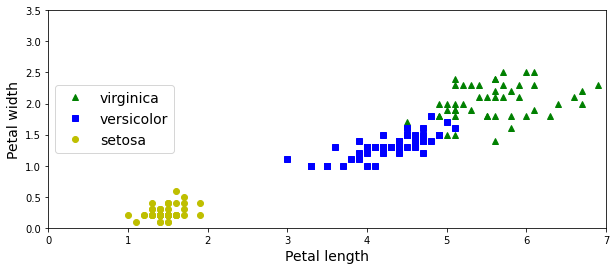

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(iris_features[iris_targets==2, 2], iris_features[iris_targets==2, 3], "g^", label=iris_target_names[2])
plt.plot(iris_features[iris_targets==1, 2], iris_features[iris_targets==1, 3], "bs", label=iris_target_names[1])
plt.plot(iris_features[iris_targets==0, 2], iris_features[iris_targets==0, 3], "yo", label=iris_target_names[0])

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

## Modell-Definition

In [7]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [8]:
model = Sequential([
    Dense(4, activation='relu', dtype=tf.float64),
    Dense(3, activation='softmax', dtype=tf.float64) 
])

In [10]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    iris_features, 
    iris_targets, 
    epochs=20, 
    batch_size=2,
    validation_split=0.2
)

Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 1.0281 - accuracy: 0.5946 - val_loss: 1.2253 - val_accuracy: 0.0000e+00
Epoch 2/20
60/60 [==============================] - 0s 929us/step - loss: 0.8291 - accuracy: 0.7187 - val_loss: 1.1891 - val_accuracy: 0.0000e+00
Epoch 3/20
60/60 [==============================] - 0s 966us/step - loss: 0.7637 - accuracy: 0.7917 - val_loss: 0.6872 - val_accuracy: 0.7000
Epoch 4/20
60/60 [==============================] - 0s 892us/step - loss: 0.7086 - accuracy: 0.7981 - val_loss: 1.3032 - val_accuracy: 0.0000e+00
Epoch 5/20
60/60 [==============================] - 0s 945us/step - loss: 0.6770 - accuracy: 0.8070 - val_loss: 1.0689 - val_accuracy: 0.0000e+00
Epoch 6/20
60/60 [==============================] - 0s 918us/step - loss: 0.6135 - accuracy: 0.8639 - val_loss: 1.1265 - val_accuracy: 0.0000e+00
Epoch 7/20
60/60 [==============================] - 0s 981us/step - loss: 0.5699 - accuracy: 0.8379 - val_loss: 0.4244 - val_accur

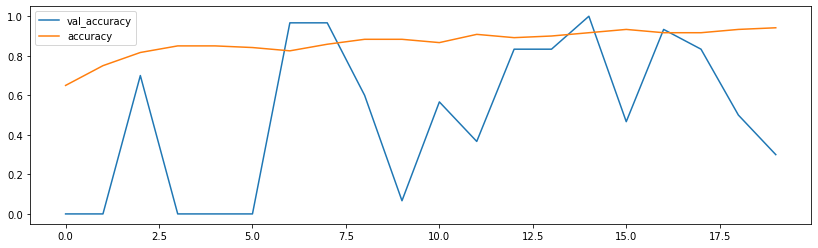

In [13]:
hist_df = pd.DataFrame(history.history)
plt.figure(figsize=(14, 4))
plt.plot(hist_df['val_accuracy'], label='val_accuracy')
plt.plot(hist_df['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (2, 4)                    20        
_________________________________________________________________
dense_1 (Dense)              (2, 3)                    15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [15]:
idx = 20
iris_features[idx:idx+1]

array([[5.4, 3.4, 1.7, 0.2]])

In [16]:
# mit der predict Methode lässt sich das Modell verwenden um Vorhersagen zu machen
idx = 20
model.predict(iris_features[idx:idx+1])

array([[0.81374342, 0.12447329, 0.06178328]])

In [17]:
# np.argmax lässt sich so die wahrscheinlichste Klasse auswählen:
np.argmax(model.predict(iris_features[idx:idx+1]))

0

In [19]:
idx = 46
print('Predicted label:', iris_target_names[np.argmax(model.predict(iris_features[idx:idx+1]))])
print('True label:', iris_target_names[iris_targets[idx]])

Predicted label: setosa
True label: setosa


# MNIST Datensatz

In [20]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Erster Blick auf die Datenstruktur

In [21]:
print('Training features shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

print('Test features shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)
# Was beduetet die Struktur? Was ist 28x28?

Training features shape: (60000, 28, 28)
Training labels shape: (60000,)
Test features shape: (10000, 28, 28)
Test labels shape: (10000,)


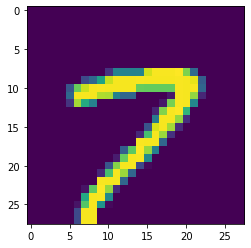

In [22]:
# Mit imshow kann man Bilder visualisieren mit matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(train_images[123])
plt.show()

In [23]:
train_images.dtype

dtype('uint8')

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

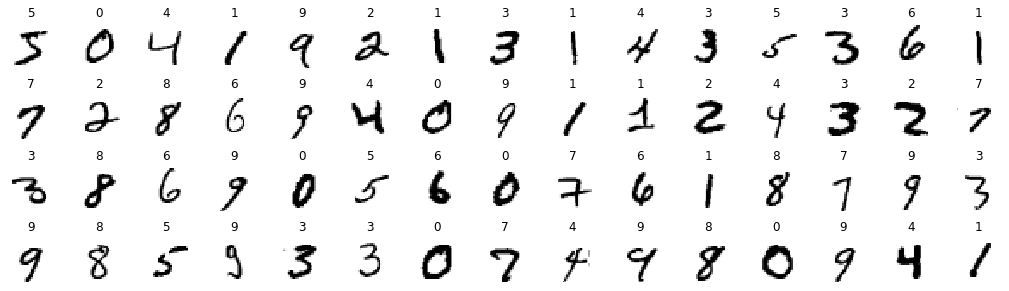

In [24]:
digit = train_images[0]

n_rows = 4
n_cols = 15
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(train_labels[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [29]:
# Vorbereitung der Daten:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Übung:

* Baue ein neuronales Netzwerk und trainiere es auf dem MNIST Datensatz
    * Definiere ein Modell mit Sequential
    * Füge Dense Layers mit entsprechenden Aktivierungsfunktionen hinzu
    * kompiliere das Modell
    * fitte das Modell
* Verändere Anzahl der hidden Layers, Neurone in den Layers, sowie andere Parameter wie learning rate
    * Was ist die höchste Accuracy auf dem Testdatensatz, die du erreichen kannst?

Hinweise: Mit 'model.evaluate(test_images, test_labels)' erhält man die Metriken, welche man beim kompilieren des Modells eingegeben hat ausgewertet auf dem Testdatensatz zurück. Noch besser ist es in der fit Methode den Test Datensatz via 'validation_data=(test_images, test_labels)' einzugeben.

Siehe auch: https://keras.io/api/models/model_training_apis/

In [92]:
28*28

784

In [60]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

model = Sequential([
    Dense(256, activation='relu'),
    #Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') 
])

In [61]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.5*0.001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [62]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.8062
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1381 - accuracy: 0.9598
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9732
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9796
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9849
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9899
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9919
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9936
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.9948
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9956

In [63]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 675us/step - loss: 0.0874 - accuracy: 0.9802


[0.08735973387956619, 0.9801999926567078]

In [95]:
model.predict( test_images[idx:idx+1] )

array([[6.7275790e-12, 5.8425396e-11, 1.0000000e+00, 8.3345150e-11,
        1.2258464e-13, 8.9456928e-18, 2.4059045e-15, 4.1181772e-12,
        4.9698416e-11, 2.5087567e-17]], dtype=float32)

In [96]:
test_images[idx].shape

(784,)

In [99]:
model.predict(test_images[idx:idx+128])

array([[6.72763061e-12, 5.84258406e-11, 1.00000000e+00, ...,
        4.11817715e-12, 4.96974718e-11, 2.50877626e-17],
       [7.26288430e-12, 8.00164796e-12, 1.85441635e-07, ...,
        9.99994993e-01, 1.26020347e-10, 4.81851839e-06],
       [5.46238768e-18, 1.22340671e-11, 4.12847702e-21, ...,
        2.64489576e-11, 4.92475798e-14, 1.00000000e+00],
       ...,
       [6.45349977e-18, 1.03119705e-14, 3.86452239e-21, ...,
        6.58169208e-09, 1.91791635e-19, 1.00000000e+00],
       [1.74093560e-17, 4.12052614e-11, 8.09854620e-17, ...,
        2.69758652e-17, 1.42247303e-12, 6.72614048e-11],
       [7.27021091e-12, 1.00000000e+00, 3.54833607e-09, ...,
        6.06896152e-13, 2.16487765e-11, 9.93734317e-10]], dtype=float32)

(batch_size, 784)

(x, 784)

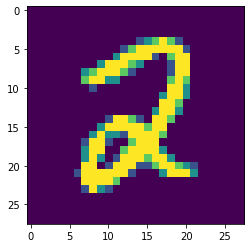

Prediction: 2


In [88]:
idx = 1506
plt.figure(figsize=(4, 4))
plt.imshow(test_images[idx].reshape((28, 28)))
plt.show()
print("Prediction:", np.argmax(model.predict(test_images[idx:idx+10])) )

In [91]:
print(test_images[idx:idx+1].shape)
print(test_images[idx].shape)

(1, 784)
(784,)


In [90]:
model.predict(test_images[idx:idx+1])

array([[6.7275790e-12, 5.8425396e-11, 1.0000000e+00, 8.3345150e-11,
        1.2258464e-13, 8.9456928e-18, 2.4059045e-15, 4.1181772e-12,
        4.9698416e-11, 2.5087567e-17]], dtype=float32)

# Übung 2:
* Betrachte den vorliegenden Datensatz
* Um was für Daten handelt es sich?
* Trainiere ein Modell auf dem Datensatz und Werte die Accuracy aus.

In [64]:
from keras.datasets import cifar10
(train_data, train_target), (test_data,test_target) = cifar10.load_data()

In [65]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape, test_target.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [102]:
np.unique(test_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [66]:
label_names = {
    0: 'airplane', 
    1: 'automobile',
    2: 'bird', 
    3: 'cat',
    4: 'deer',
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

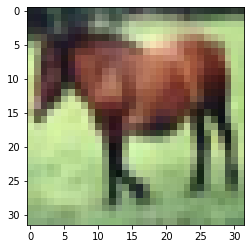

In [67]:
plt.imshow(train_data[7], cmap=plt.cm.binary)
plt.show()

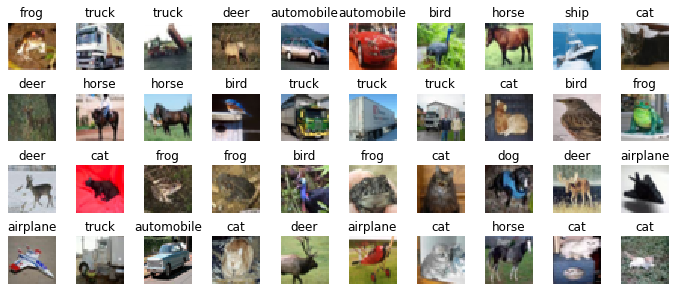

In [68]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_data[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(label_names[int(train_target[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [69]:
train_data = train_data.reshape((50000, 32 * 32 * 3)) 
train_data = train_data.astype('float32') / 255 

test_data = test_data.reshape((10000, 32 * 32 * 3)) 
test_data = test_data.astype('float32') / 255

In [70]:
def build_model(n_neurons_layers, learning_rate=1e-3):
    model = Sequential()
    for n_neuron in n_neurons_layers:
        model.add(Dense(n_neuron, activation='relu', dtype=tf.float32))
    model.add(Dense(10, activation='softmax', dtype=tf.float32))
    
    opt = keras.optimizers.Adam(learning_rate)
    model.compile(
        optimizer=opt, 
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def plot_history(history):
    hist_df = pd.DataFrame(history.history)
    
    plt.figure(figsize=(14, 5))
    plt.plot(hist_df['val_accuracy'], label='val_accuracy')
    plt.plot(hist_df['accuracy'], label='accuracy')
    plt.legend(fontsize=15)
    plt.show()

Epoch 1/50
469/469 [==============================] - 1s 3ms/step - loss: 1.4796 - accuracy: 0.5463 - val_loss: 0.3660 - val_accuracy: 0.9068
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.9146 - val_loss: 0.2407 - val_accuracy: 0.9355
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2307 - accuracy: 0.9379 - val_loss: 0.1953 - val_accuracy: 0.9454
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1799 - accuracy: 0.9508 - val_loss: 0.1602 - val_accuracy: 0.9535
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1500 - accuracy: 0.9599 - val_loss: 0.1429 - val_accuracy: 0.9588
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1301 - accuracy: 0.9636 - val_loss: 0.1282 - val_accuracy: 0.9626
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9687 - val_loss: 0.1258 - val_accuracy: 0.9629
Epoch 

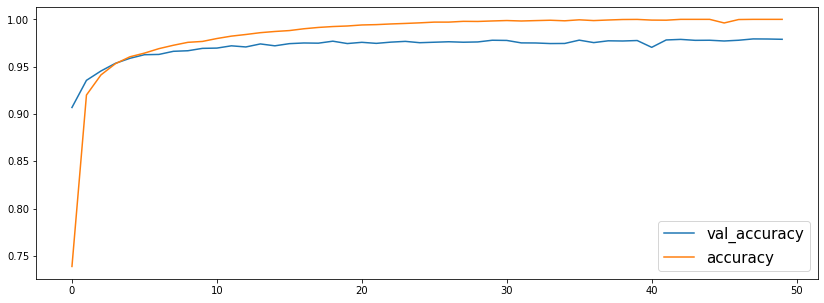

In [73]:
model = build_model([256, 128, 128, 64, 10], learning_rate=1e-4)
history = model.fit(
    train_images, train_labels, 
    validation_data=(test_images, test_labels), 
    epochs=50, batch_size=128
)
results = model.evaluate(test_images, test_labels)
print(results)
plot_history(history)